In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import GridSimulator
HeatTransfer = GridSimulator.ClassHeatSimulation()

In [2]:
import GridSimulator

In [3]:
HeatSimulation = GridSimulator.ClassHeatSimulation()

In [4]:
# HeatTransfer.UpdatePropertiesTable()
# HeatTransfer.PropsTable

In [5]:
NumberNodes = 4
HeatSimulation.SetSize(.005,.025)
HeatSimulation.SetNodes(NumberNodes,.10)
HeatSimulation.SetMaterialProperties(7753,486,36)
HeatSimulation.SetConvectionProperties(4,25)
HeatSimulation.EnableSurfaceHeatTransfer(True)
HeatSimulation.SetHeatSource(200)
HeatSimulation.SetInitalTemp(25)

In [6]:
HeatSimulation.SuggestedTimeInc(True)

20.0

In [7]:
HeatSimulation.SetTimeIncrement(10)

In [8]:
print(HeatSimulation.GetTempatureAtNodeAtTime(0,300,1))
HeatSimulation.AllTemp

156.77617937105404


,Time,Heater,Node1,Node2,Node3,Node4,Convection
0,0.0,200.0,25.000000,25.000000,25.000000,25.000000,25.0
1,10.0,200.0,51.751891,25.000000,25.000000,25.000000,25.0
2,20.0,200.0,70.279329,29.089507,25.000000,25.000000,25.0
3,30.0,200.0,83.735950,34.754009,25.625154,25.000000,25.0
4,40.0,200.0,93.921463,40.829701,26.924036,25.191132,25.0
5,50.0,200.0,101.904377,46.793112,28.781593,25.720618,25.0
6,60.0,200.0,108.344683,52.427458,31.060629,26.655244,25.0
7,70.0,200.0,113.666328,57.662519,33.643196,27.999317,25.0
8,80.0,200.0,118.152189,62.496443,36.437531,29.719759,25.0
9,90.0,200.0,121.997894,66.957162,39.374745,31.765606,25.0


Now on to the controller
For now time length is 10 min

In [9]:
def Logic(TempArray,Type):
    if Type == "BangBang":
        if (TempArray[NumberNodes + 1] > 135 + 5):
            HeatSimulation.TempLeftEnd = 25;
        elif (TempArray[NumberNodes + 1] <= 135 - 5):
            HeatSimulation.TempLeftEnd = 200;

In [10]:
Duration = 3600
StepNumber = 0
TargetTemp = 45
HeatSimulation.TempLeftEnd = 200
HeatSimulation.SetHeatSource(200)
TEMPS = HeatTransfer.Temps
while StepNumber < Duration:
    Inc = 10
    StepNumber = StepNumber + Inc
    #print(StepNumber)
    #print(HeatSimulation.Temps)
    HeatSimulation.SetInitalTempProfile(TEMPS)
    #print(HeatSimulation.Temps)
    HeatSimulation.GetTempatureAtNodeAtTime(StepNumber-Inc,StepNumber,4)
    TEMPS = HeatSimulation.Temps
    #print(HeatSimulation.AllTemp)
    #print(TEMPS)
    Logic(TEMPS,"BangBang")

In [11]:
HeatSimulation.AllTemp

,Time,Heater,Node1,Node2,Node3,Node4,Convection
0,0.0,200.0,25.000000,25.000000,25.000000,25.000000,25.0
1,10.0,200.0,51.751891,25.000000,25.000000,25.000000,25.0
2,20.0,200.0,70.279329,29.089507,25.000000,25.000000,25.0
3,30.0,200.0,83.735950,34.754009,25.625154,25.000000,25.0
4,40.0,200.0,93.921463,40.829701,26.924036,25.191132,25.0
...,...,...,...,...,...,...,...
356,3560.0,25.0,71.147195,106.872009,127.579920,134.077873,25.0
357,3570.0,25.0,69.475564,104.437343,125.233437,131.905943,25.0
358,3580.0,25.0,67.945668,102.136937,122.904144,129.684336,25.0
359,3590.0,200.0,93.286347,99.953809,120.599684,127.433578,25.0


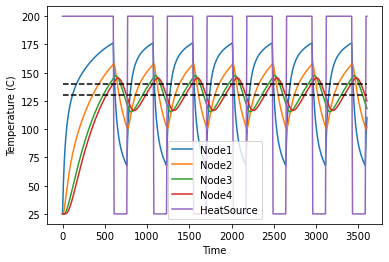

In [12]:
dfValidate4 = HeatSimulation.AllTemp
plt.figure()
plt.plot(dfValidate4.Time, dfValidate4.Node1, label="Node1")
plt.plot(dfValidate4.Time, dfValidate4.Node2, label="Node2")
plt.plot(dfValidate4.Time, dfValidate4.Node3, label="Node3")
plt.plot(dfValidate4.Time, dfValidate4.Node4, label="Node4")
plt.plot(dfValidate4.Time, dfValidate4.Heater, label="HeatSource")
#plt.plot(dfValidate4.Time, np.ones(np.shape(dfValidate4.Time))*40, label="Fluid")
plt.plot(dfValidate4.Time, 130*np.ones(dfValidate4.Time.shape), "--k")
plt.plot(dfValidate4.Time, 140*np.ones(dfValidate4.Time.shape), "--k")
plt.xlabel("Time")
plt.ylabel("Temperature (C)")
plt.rcParams["figure.figsize"] = (6,4)
plt.legend()
plt.show()

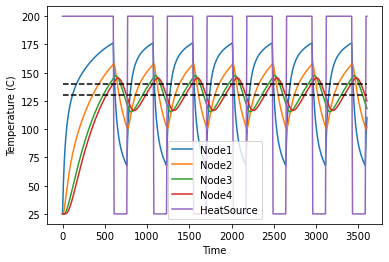

In [13]:
dfValidate4 = HeatSimulation.AllTemp
plt.figure()
plt.plot(dfValidate4.Time, dfValidate4.Node1, label="Node1")
plt.plot(dfValidate4.Time, dfValidate4.Node2, label="Node2")
plt.plot(dfValidate4.Time, dfValidate4.Node3, label="Node3")
plt.plot(dfValidate4.Time, dfValidate4.Node4, label="Node4")
plt.plot(dfValidate4.Time, dfValidate4.Heater, label="HeatSource")
#plt.plot(dfValidate4.Time, np.ones(np.shape(dfValidate4.Time))*40, label="Fluid")
plt.plot(dfValidate4.Time, 130*np.ones(dfValidate4.Time.shape), "--k")
plt.plot(dfValidate4.Time, 140*np.ones(dfValidate4.Time.shape), "--k")
plt.xlabel("Time")
plt.ylabel("Temperature (C)")
plt.legend()
plt.show()

For Pid https://onion.io/2bt-pid-control-python/

In [20]:
Duration = 3600
StepNumber = 0
TargetTemp = 45
HeatSimulation.TempLeftEnd = 300
HeatSimulation.SetHeatSource(300)
TEMPS = HeatTransfer.Temps
while StepNumber < Duration:
    Inc = 10
    StepNumber = StepNumber + Inc
    #print(StepNumber)
    #print(HeatSimulation.Temps)
    HeatSimulation.SetInitalTempProfile(TEMPS)
    #print(HeatSimulation.Temps)
    HeatSimulation.GetTempatureAtNodeAtTime(StepNumber-Inc,StepNumber,4)
    TEMPS = HeatSimulation.Temps
    if StepNumber < 400:
        HeatSimulation.SetHeatSource(300)
    elif 400 < StepNumber < 600:
        HeatSimulation.SetHeatSource(60)
    elif StepNumber > 600:
        HeatSimulation.SetHeatSource(140)

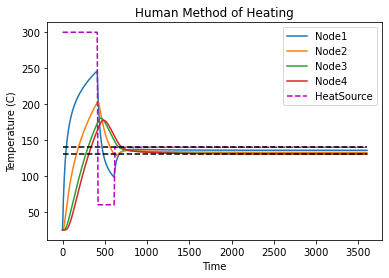

In [34]:
dfValidate4 = HeatSimulation.AllTemp
plt.figure()
plt.plot(dfValidate4.Time, dfValidate4.Node1, label="Node1")
plt.plot(dfValidate4.Time, dfValidate4.Node2, label="Node2")
plt.plot(dfValidate4.Time, dfValidate4.Node3, label="Node3")
plt.plot(dfValidate4.Time, dfValidate4.Node4, "tab:red", label="Node4")
plt.plot(dfValidate4.Time, dfValidate4.Heater, "--m", label="HeatSource")
#plt.plot(dfValidate4.Time, np.ones(np.shape(dfValidate4.Time))*40, label="Fluid")
plt.plot(dfValidate4.Time, 130*np.ones(dfValidate4.Time.shape), "--k")
plt.plot(dfValidate4.Time, 140*np.ones(dfValidate4.Time.shape), "--k")
plt.xlabel("Time")
plt.ylabel("Temperature (C)")
plt.title('Human Method of Heating')
plt.legend()
plt.show()

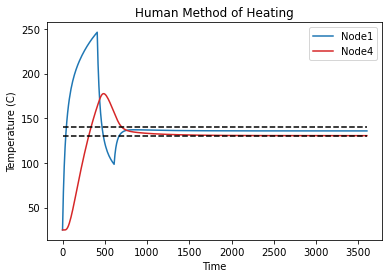

In [35]:
dfValidate4 = HeatSimulation.AllTemp
plt.figure()
plt.plot(dfValidate4.Time, dfValidate4.Node1, label="Node1")
#plt.plot(dfValidate4.Time, dfValidate4.Node2, label="Node2")
#plt.plot(dfValidate4.Time, dfValidate4.Node3, label="Node3")
plt.plot(dfValidate4.Time, dfValidate4.Node4, "tab:red", label="Node4")
#plt.plot(dfValidate4.Time, dfValidate4.Heater, "--m", label="HeatSource")
#plt.plot(dfValidate4.Time, np.ones(np.shape(dfValidate4.Time))*40, label="Fluid")
plt.plot(dfValidate4.Time, 130*np.ones(dfValidate4.Time.shape), "--k")
plt.plot(dfValidate4.Time, 140*np.ones(dfValidate4.Time.shape), "--k")
plt.xlabel("Time")
plt.ylabel("Temperature (C)")
plt.title('Human Method of Heating')
plt.legend()
plt.show()